In [20]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv("synthetic_loss_data.csv")

In [22]:
df.head()

,Cultural_Background,Religious_Affiliation,Level_of_Education,Family_Income_Level,Gender,Urban_or_Rural,Peer_Group_Influence,Education,Parenting_Style,Tech_Media_Exposure,Age_of_Loss
0,African,Highly Religious,College,Low,Non-binary,Rural,High,No,Authoritarian,High,21.0
1,Middle Eastern,NaN,High School,High,Male,Rural,High,Yes,Permissive,Medium,21.0
2,Western,NaN,High School,Low,Non-binary,Urban,High,Yes,Authoritarian,High,14.0
3,African,Highly Religious,College,Middle,Female,Urban,Moderate,Yes,Authoritarian,Medium,20.0
4,African,NaN,College,Middle,Non-binary,Rural,Low,No,Permissive,Low,20.0


In [23]:
column_maps = {}
for column_name in df.columns:
    if column_name == 'Age_of_Loss':
        continue
    uniq = df[column_name].unique()
    column_maps[column_name] = {uniq[ind]: ind+1 for ind, val in enumerate(uniq)}
    

In [24]:
column_maps

{'Cultural_Background': {'African': 1,
  'Middle Eastern': 2,
  'Western': 3,
  'Asian': 4},
 'Religious_Affiliation': {'Highly Religious': 1, nan: 2, 'Moderate': 3},
 'Level_of_Education': {'College': 1, 'High School': 2, 'Advanced Degree': 3},
 'Family_Income_Level': {'Low': 1, 'High': 2, 'Middle': 3},
 'Gender': {'Non-binary': 1, 'Male': 2, 'Female': 3},
 'Urban_or_Rural': {'Rural': 1, 'Urban': 2},
 'Peer_Group_Influence': {'High': 1, 'Moderate': 2, 'Low': 3},
 'Education': {'No': 1, 'Yes': 2},
 'Parenting_Style': {'Authoritarian': 1, 'Permissive': 2, 'Neglectful': 3},
 'Tech_Media_Exposure': {'High': 1, 'Medium': 2, 'Low': 3}}

In [25]:
for column in df:
    if column == 'Age_of_Loss':
        continue
    df[column] = df[column].map(column_maps[column])

In [26]:
df

,Cultural_Background,Religious_Affiliation,Level_of_Education,Family_Income_Level,Gender,Urban_or_Rural,Peer_Group_Influence,Education,Parenting_Style,Tech_Media_Exposure,Age_of_Loss
0,1,1,1,1,1,1,1,1,1,1,21.0
1,2,2,2,2,2,1,1,2,2,2,21.0
2,3,2,2,1,1,2,1,2,1,1,14.0
3,1,1,1,3,3,2,2,2,1,2,20.0
4,1,2,1,3,1,1,3,1,2,3,20.0
...,...,...,...,...,...,...,...,...,...,...,...
495,1,2,3,2,2,2,1,2,3,2,17.0
496,1,2,2,1,3,1,2,1,3,1,20.0
497,2,2,3,3,2,2,2,2,1,2,15.0
498,3,3,2,1,1,2,3,2,2,1,20.0


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:, 'Cultural_Background':'Tech_Media_Exposure'], df['Age_of_Loss'], test_size=0.2)

In [28]:
X_train

,Cultural_Background,Religious_Affiliation,Level_of_Education,Family_Income_Level,Gender,Urban_or_Rural,Peer_Group_Influence,Education,Parenting_Style,Tech_Media_Exposure
163,2,2,3,2,1,2,3,1,3,3
358,3,3,1,3,2,2,2,1,2,1
427,2,2,1,2,1,1,2,2,1,2
138,1,3,1,2,3,2,2,1,3,3
475,2,3,3,3,1,2,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...
480,2,3,3,2,3,2,3,1,3,1
352,3,3,3,1,3,1,2,2,2,2
7,3,2,2,1,1,1,2,2,2,2
108,4,2,2,2,2,1,2,2,2,3


In [29]:
Y_train

163    18.0
358    16.0
427    19.0
138    18.0
475    19.0
       ... 
480    18.0
352    21.0
7      19.0
108    17.0
111    19.0
Name: Age_of_Loss, Length: 400, dtype: float64

In [30]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [31]:
prediction = lr.predict(X_test)

In [32]:
prediction

array([17.40104452, 17.53927597, 17.35926937, 18.11379134, 18.31805858,
       18.31211724, 17.81725192, 18.39083134, 18.18246932, 18.20711915,
       17.69652588, 17.5086783 , 18.48410022, 17.86352789, 17.70797552,
       18.74431329, 18.32638944, 18.55946101, 18.21147292, 18.22039148,
       18.2907907 , 18.29458742, 18.06301576, 18.12335535, 18.35557092,
       17.45003658, 18.27740022, 18.35383437, 17.6828852 , 17.65117873,
       18.11781696, 18.44479601, 18.68718147, 18.0015423 , 18.48168556,
       18.20140333, 17.71497561, 18.0767351 , 17.83814787, 17.87976295,
       18.52685934, 18.21640433, 18.44795698, 17.59535974, 18.55881098,
       18.36476054, 18.26216306, 17.71369407, 17.78520188, 17.68045007,
       18.3864714 , 18.29724092, 17.78923917, 18.17162056, 18.07970867,
       17.71567419, 18.20343039, 18.35469095, 17.89501103, 18.00569044,
       17.97289344, 18.69718643, 18.35139813, 18.08511551, 17.87493648,
       17.66563796, 18.53415031, 17.54009464, 17.49185137, 18.50

In [33]:
prediction.shape

(100,)

In [34]:
Y_test

403    17.0
68     17.0
15     14.0
474    24.0
75     17.0
       ... 
498    20.0
455    15.0
41     20.0
244    16.0
169    22.0
Name: Age_of_Loss, Length: 100, dtype: float64

In [35]:
import numpy as np
absolute_deviation = np.abs(prediction - Y_test)
mean_absolute_error = np.mean(absolute_deviation)

percentage_deviation = (absolute_deviation / Y_test) * 100
mean_absolute_percentage_error = np.mean(percentage_deviation)

In [36]:
mean_absolute_percentage_error

np.float64(10.61206871133238)

In [37]:
column_maps

{'Cultural_Background': {'African': 1,
  'Middle Eastern': 2,
  'Western': 3,
  'Asian': 4},
 'Religious_Affiliation': {'Highly Religious': 1, nan: 2, 'Moderate': 3},
 'Level_of_Education': {'College': 1, 'High School': 2, 'Advanced Degree': 3},
 'Family_Income_Level': {'Low': 1, 'High': 2, 'Middle': 3},
 'Gender': {'Non-binary': 1, 'Male': 2, 'Female': 3},
 'Urban_or_Rural': {'Rural': 1, 'Urban': 2},
 'Peer_Group_Influence': {'High': 1, 'Moderate': 2, 'Low': 3},
 'Education': {'No': 1, 'Yes': 2},
 'Parenting_Style': {'Authoritarian': 1, 'Permissive': 2, 'Neglectful': 3},
 'Tech_Media_Exposure': {'High': 1, 'Medium': 2, 'Low': 3}}

In [38]:
ip = []
for col, mapping in column_maps.items():
    print(col)
    for val, ind in mapping.items():
        print(f"{ind}: {val}")
    ip.append(int(input("Enter choice: ")))

print(f"Predicted age is {lr.predict(np.array([ip]))[0]}")

Cultural_Background
1: African
2: Middle Eastern
3: Western
4: Asian


ValueError: invalid literal for int() with base 10: ''

In [39]:
from sklearn.metrics import r2_score
r2_score(Y_test, prediction)

-0.01861938761523496

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [41]:
ridge_regressor=Ridge()

In [42]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [43]:
GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=parameters,
             scoring='neg_mean_squared_error')

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [44]:
ridgecv.best_params_

{'alpha': 90}

In [45]:
ridge_pred=ridgecv.predict(X_test)

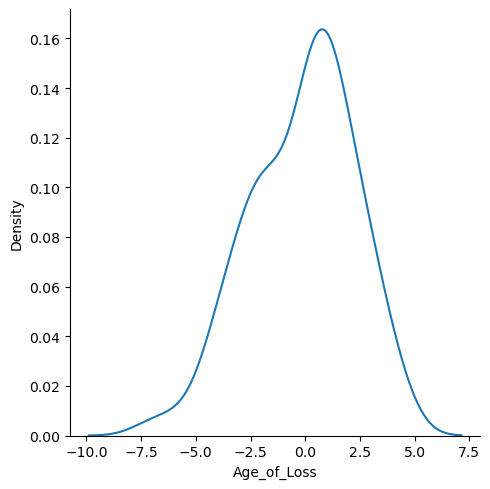

In [46]:
import seaborn as sns
sns.displot(ridge_pred-Y_test,kind='kde')

In [47]:
score=r2_score(ridge_pred,Y_test)

In [48]:
score

-135.0095155696659

In [49]:
from sklearn.linear_model import Lasso

In [50]:
lasso = Lasso()

In [51]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [52]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-5.548914062500001


In [53]:
lasso_pred=lassocv.predict(X_test)

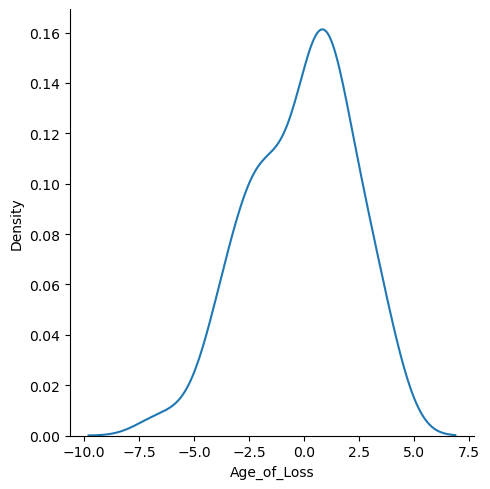

In [54]:
import seaborn as sns
sns.displot(lasso_pred-Y_test,kind='kde')

In [55]:
r2_score(lasso_pred,Y_test)

-4.410240618116682e+29

In [56]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
params = {'alpha': [0.5, 1, 1.5, 2, 2.5, 3], 'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7]}
elastic_cv = GridSearchCV(en, params)

In [57]:
elastic_cv.fit(X_train, Y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.5, 1, 1.5, 2, 2.5, 3],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7]})

In [58]:
elastic_cv.best_params_

{'alpha': 0.5, 'l1_ratio': 0.4}

In [61]:
y_pred = elastic_cv.predict(X_test)

In [62]:
y_pred

array([18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425, 18.0425,
       18.0425, 18.0

In [63]:
r2_score(y_pred,Y_test)

-4.410240618116682e+29